# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
soup=BeautifulSoup(requests.get("https://rate.bot.com.tw/xrt?Lang=zh-TW").text,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" lang="zh-TW">
 <head>
  <meta charset="utf-8"/>
  <title>
   臺灣銀行牌告匯率
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="臺灣銀行匯率利率黃金牌價查詢" name="description"/>
  <meta content="" name="keywords"/>
  <meta content="width=device-width, initial-scale=1, user-scalable=no" name="viewport"/>
  <meta content="telephone=no" name="format-detection"/>
  <meta content="index,follow" name="robots"/>
  <link href="/favicon.ico" rel="icon" type="image/x-icon"/>
  <link href="/Content/css/font-awesome.min.css" rel="stylesheet"/>
  <link href="/Content/css/jquery-ui.min.css" rel="stylesheet"/>
  <link href="/Content/main-3.3.0.css" rel="stylesheet"/>
  <style>
   h1.hero__header_small {
            font-size: 26px;
            margin: 12px 0;
        }

            h1.hero__header_eng {
                font-size: 20px;
                margin: -8px 0;
            }

        .chart-key-value .sp {
            position: relative;
       

In [3]:
print(soup.find('div',class_='hidden-phone print_show').text.replace(' ','').replace('\r','').replace('\n',''))

buy_=soup.find('td',attrs={'data-table':'本行現金買入'}).text
sell_=soup.find('td',attrs={'data-table':'本行現金賣出'}).text
print('本行現金買入:{}\n本行現金買出:{}'.format(buy_,sell_))

美金(USD)
本行現金買入:29.66
本行現金買出:30.33


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [4]:
all_currency = soup.find('tbody').find_all('tr')
for i in all_currency:#加上.find('tbody')更精準地鎖定tr的位置

    print(i.find('div').find('div',class_='hidden-phone print_show').text.replace(' ','').replace('\t','').replace('\n','').replace('\r',''))

    buy_=i.find('td',attrs={'data-table':'本行現金買入'}).text
    sell_=i.find('td',attrs={'data-table':'本行現金賣出'}).text
    print('本行現金買入:{}\n本行現金買出:{}'.format(buy_,sell_))
    print('==================================================')

美金(USD)
本行現金買入:29.66
本行現金買出:30.33
港幣(HKD)
本行現金買入:3.714
本行現金買出:3.918
英鎊(GBP)
本行現金買入:37.59
本行現金買出:39.71
澳幣(AUD)
本行現金買入:19.22
本行現金買出:20
加拿大幣(CAD)
本行現金買入:21.45
本行現金買出:22.36
新加坡幣(SGD)
本行現金買入:21.04
本行現金買出:21.95
瑞士法郎(CHF)
本行現金買入:31.33
本行現金買出:32.53
日圓(JPY)
本行現金買入:0.277
本行現金買出:0.2898
南非幣(ZAR)
本行現金買入:-
本行現金買出:-
瑞典幣(SEK)
本行現金買入:2.79
本行現金買出:3.31
紐元(NZD)
本行現金買入:18.5
本行現金買出:19.35
泰幣(THB)
本行現金買入:0.828
本行現金買出:1.018
菲國比索(PHP)
本行現金買入:0.5213
本行現金買出:0.6543
印尼幣(IDR)
本行現金買入:0.00173
本行現金買出:0.00243
歐元(EUR)
本行現金買入:33.24
本行現金買出:34.58
韓元(KRW)
本行現金買入:0.02344
本行現金買出:0.02734
越南盾(VND)
本行現金買入:0.00092
本行現金買出:0.00142
馬來幣(MYR)
本行現金買入:5.982
本行現金買出:7.607
人民幣(CNY)
本行現金買入:4.223
本行現金買出:4.385


## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖

美金(USD)


<Figure size 720x576 with 0 Axes>

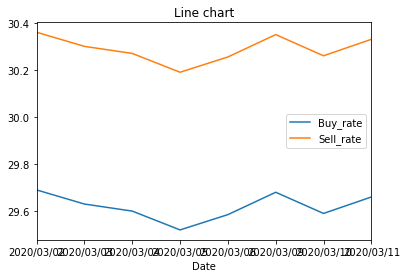

In [5]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
all_currency
# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
USD_=all_currency[0].find('div').find('div',class_='hidden-phone print_show').text.replace(' ','').replace('\t','').replace('\n','').replace('\r','')
print(USD_)
# 針對美金，找到其「歷史匯率」的首頁 
USD_history ='https://rate.bot.com.tw'+all_currency[0].find(name='td', attrs={'data-table':'歷史匯率'}).a['href']
# 到貨幣歷史匯率網頁，選擇該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
USD_history_March = USD_history.replace('history','quote/2020-03')
march_quote=BeautifulSoup(requests.get(USD_history_March).text,'lxml')
march_table=march_quote.find('table',title="歷史本行營業時間牌告匯率").find('tbody').find_all('tr')
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖


#開空LIST
history_date = list()
history_buy = list()
history_sell = list()


#開始丟東西進去
for i in march_table:
    
    #先把日期丟進去
    date_string = i.a.get_text()     #這日期好像不換也沒差?，但換了感覺是確保等下一定是正確的格式
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    history_date.append(date)
    
                        #find_all是因為剛好買入賣出都是同名，然後等下用[0][1]篩選
    history_ex_rate=i.find_all('td',class_="rate-content-cash text-right print_table-cell")
    
    #本行買入丟進去            #float()因為他是str的型態，所以要換成float型態
    history_buy.append(float(history_ex_rate[0].text))   # 歷史買入匯率
    
    #本行賣出丟進去
    history_sell.append(float(history_ex_rate[1].text)) # 歷史賣出匯率

# 將匯率資料建成dataframe形式           #順便改名
data=pd.DataFrame({'Date': history_date,
                   'Buy_rate':history_buy,
                   'Sell_rate':history_sell})

data = data.set_index('Date')  # 指定日期欄位為datafram的index
data = data.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10,8))  #設定他的解析度?
data[['Buy_rate','Sell_rate']].plot()  #這邊是否就是指定index的用意?
plt.legend(loc='best') #這個是設定他的圖示在哪邊  用best就是最佳化，不擋圖? #upper left/right , lower left/right ,center  之類的
plt.title("Line chart")  #命名
plt.show() #呈現
#不知道為什麼圖有點小，導致日期都變小，先不糾結

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

美金(USD)


<Figure size 720x576 with 0 Axes>

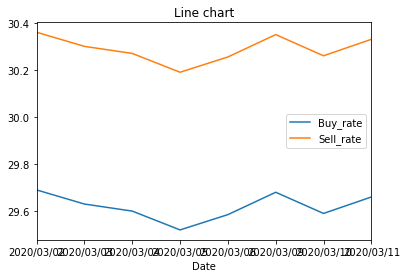

港幣(HKD)


<Figure size 720x576 with 0 Axes>

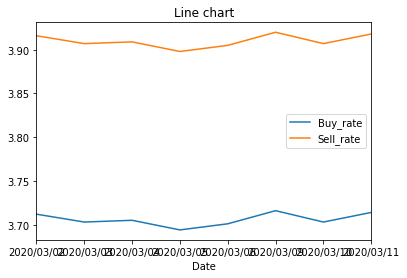

英鎊(GBP)


<Figure size 720x576 with 0 Axes>

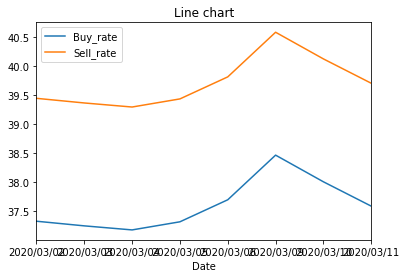

澳幣(AUD)


<Figure size 720x576 with 0 Axes>

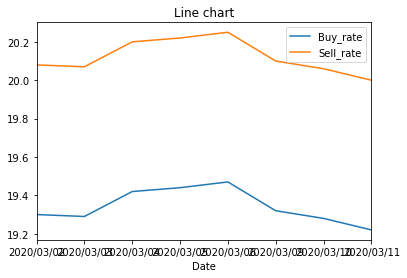

加拿大幣(CAD)


<Figure size 720x576 with 0 Axes>

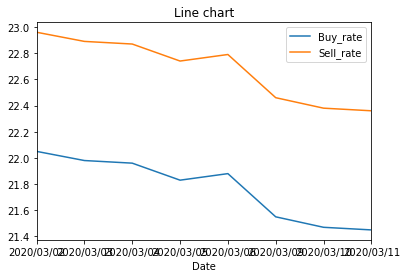

新加坡幣(SGD)


<Figure size 720x576 with 0 Axes>

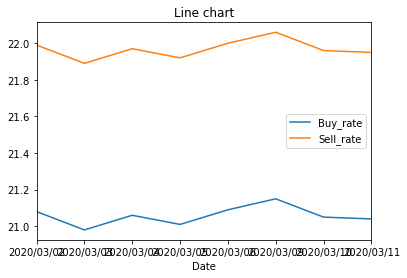

瑞士法郎(CHF)


<Figure size 720x576 with 0 Axes>

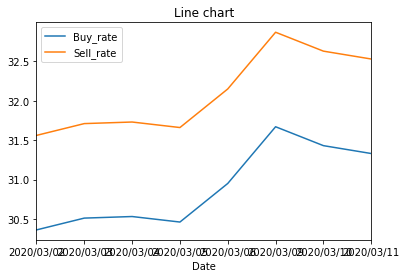

日圓(JPY)


<Figure size 720x576 with 0 Axes>

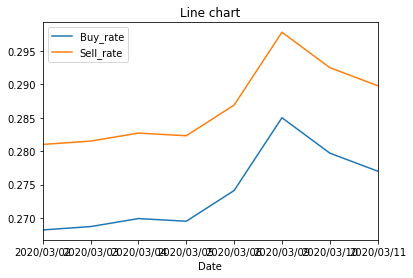

南非幣(ZAR)


<Figure size 720x576 with 0 Axes>

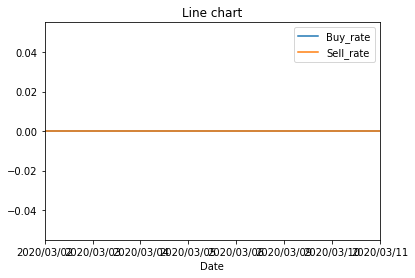

瑞典幣(SEK)


<Figure size 720x576 with 0 Axes>

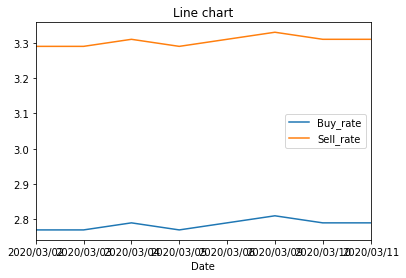

紐元(NZD)


<Figure size 720x576 with 0 Axes>

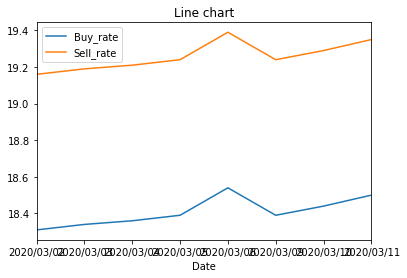

泰幣(THB)


<Figure size 720x576 with 0 Axes>

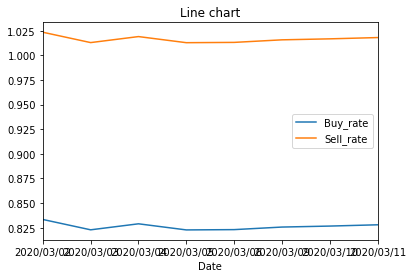

菲國比索(PHP)


<Figure size 720x576 with 0 Axes>

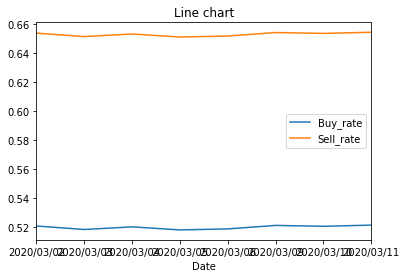

印尼幣(IDR)


<Figure size 720x576 with 0 Axes>

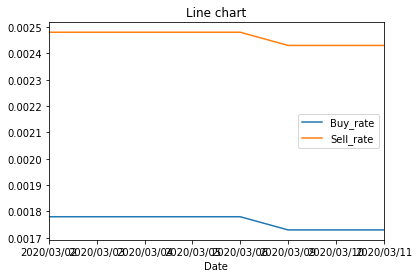

歐元(EUR)


<Figure size 720x576 with 0 Axes>

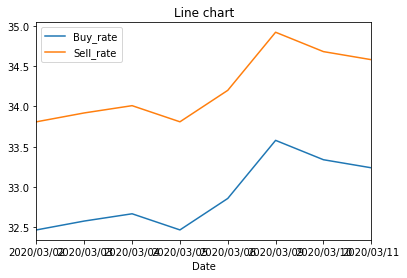

韓元(KRW)


<Figure size 720x576 with 0 Axes>

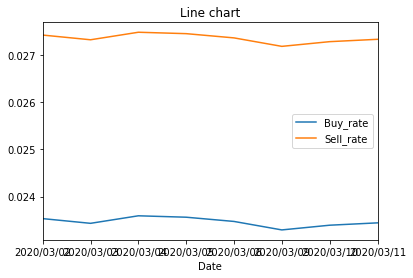

越南盾(VND)


<Figure size 720x576 with 0 Axes>

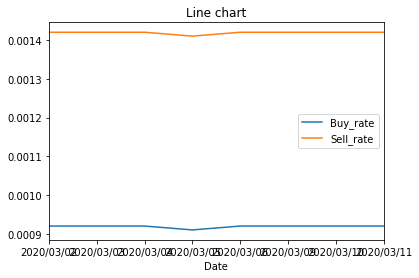

馬來幣(MYR)


<Figure size 720x576 with 0 Axes>

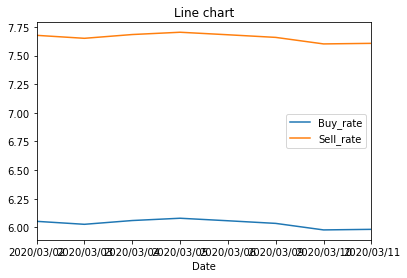

人民幣(CNY)


<Figure size 720x576 with 0 Axes>

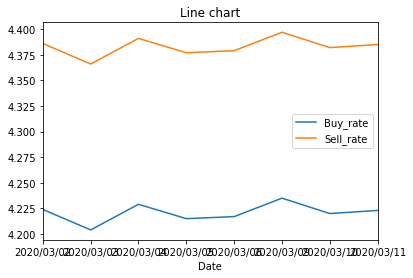

In [6]:
#個人備註
#其實就是把我上面改成USD的東西變成i，然後整個塞到for迴圈做就ok了
#      #***= 改動了的地方
#================================================

# 先到牌告匯率首頁，爬取所有貨幣的種類
all_currency
# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
   #***
for i in all_currency:
        #***
    name=i.find('div').find('div',class_='hidden-phone print_show').text.replace(' ','').replace('\t','').replace('\n','').replace('\r','')
    print(name)  #套到i，那就是print不同的貨幣名稱
    
# 針對美金，找到其「歷史匯率」的首頁 

    #*********************這邊開始就是在進行一個改網頁的動作*********************
    
    #***                       #***
    a='https://rate.bot.com.tw'+i.find(name='td', attrs={'data-table':'歷史匯率'}).a['href']
    #*********************a就會等於新的網址，然後在i裡面一直換成不同貨幣的網址*********************
    
# 到貨幣歷史匯率網頁，選擇該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料


# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料

#*********************這邊就是把他replace成「已篩選過為指定2020年3月」的網址，原本他中間叫history，而後面的/就是貨幣一直在變*********************
   #***
    i_history_March = a.replace('history','quote/2020-03')
    march_quote=BeautifulSoup(requests.get(i_history_March).text,'lxml')
    march_table=march_quote.find('table',title="歷史本行營業時間牌告匯率").find('tbody').find_all('tr')
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖


#想一下為什麼不用動?  因為他的關鍵在於他是透過「一開始的網頁的資訊」去更改成「不同網頁的3月歷史走向」
#所以其實我把美元生出來，就代表我改一點東西就能把其他貨幣也生出來
#   #***   ==============================下面完全不用改====================================================

#開空LIST
    history_date = list()
    history_buy = list()
    history_sell = list()


#開始丟東西進去
    for d in march_table:
    
    #先把日期丟進去
        date_string = d.a.get_text()     #這日期好像不換也沒差?，但換了感覺是確保等下一定是正確的格式
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
        history_date.append(date)
    
                        #find_all是因為剛好買入賣出都是同名，然後等下用[0][1]篩選
        history_ex_rate=d.find_all('td',class_="rate-content-cash text-right print_table-cell")
    
    #本行買入丟進去            #float()因為他是str的型態，所以要換成float型態
        history_buy.append(float(history_ex_rate[0].text))   # 歷史買入匯率
    
    #本行賣出丟進去
        history_sell.append(float(history_ex_rate[1].text)) # 歷史賣出匯率

# 將匯率資料建成dataframe形式           #順便改名
    data=pd.DataFrame({'Date': history_date,
                   'Buy_rate':history_buy,
                   'Sell_rate':history_sell})

    data = data.set_index('Date')  # 指定日期欄位為datafram的index
    data = data.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
    plt.figure(figsize=(10,8))  #設定他的解析度?
    data[['Buy_rate','Sell_rate']].plot()  #這邊是否就是指定index的用意?
    plt.legend(loc='best') #這個是設定他的圖示在哪邊  用best就是最佳化，不擋圖? #upper left/right , lower left/right ,center  之類的
    plt.title("Line chart")  #命名
    plt.show() #呈現
#不知道為什麼圖有點小，導致日期都變小，先不糾結